<a href="https://colab.research.google.com/github/sariambarwatii/Projek/blob/main/Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# **2. Load Dataset from Clustering**

In [2]:
from google.colab import files
uploaded = files.upload()


Saving final_dataset (1).csv to final_dataset (1).csv


In [5]:
data = pd.read_csv("/content/final_dataset.csv",index_col=0)
data

,age,sex,bmi,children,smoker,region,charges,age_cat,charges/age,cluster
0,19,0,27.900,0,1,3,16884.92400,18,13084.92400,2
1,18,1,33.770,1,0,2,1725.55230,18,-1874.44770,0
2,28,1,33.000,3,0,2,4449.46200,23,-1150.53800,0
3,33,1,22.705,0,0,1,21984.47061,29,15384.47061,0
4,32,1,28.880,0,0,1,3866.85520,29,-2533.14480,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,46,600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,18,-1394.01920,0
1335,18,0,36.850,0,0,2,1629.83350,18,-1970.16650,0
1336,21,0,25.800,0,0,3,2007.94500,18,-2192.05500,0


In [6]:
data['cluster'].value_counts()

,count
cluster,
0,1064
1,150
2,124


In [7]:
correlation = data.corr()
print(correlation['cluster'].sort_values(ascending=False))

cluster        1.000000
smoker         0.933455
charges/age    0.630835
charges        0.596428
sex            0.047414
children       0.009109
age_cat       -0.023940
region        -0.025051
age           -0.030287
bmi           -0.126047
Name: cluster, dtype: float64


# **3. Data Splitting**

In [8]:
X = data.iloc[:, :-1]
y = data['cluster']

In [9]:
# splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(936, 9) (402, 9) (936,) (402,)


In [10]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [11]:
print(y_train_resampled.value_counts())
print(y_test.value_counts())

cluster
0    743
1    743
2    743
Name: count, dtype: int64
cluster
0    321
1     42
2     39
Name: count, dtype: int64


# **4. Classification**


## **a.  Build Classification Model**

In [13]:
# random forest
rf = RandomForestClassifier(random_state= 11,
                            max_depth = 3,
                            n_jobs = -1,
                            min_samples_split=5,
                            min_samples_leaf=5,
                            oob_score = True)
rf = rf.fit(X_train_resampled, y_train_resampled)
print(rf)

RandomForestClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=5,
                       n_jobs=-1, oob_score=True, random_state=11)


In [14]:
y_rf = rf.predict(X_train_resampled)
y_rf_test = rf.predict(X_test)

In [15]:
rf_cv_score = cross_val_score(rf, X_test, y_test, cv=5)
print(f'Cross-validation scores: {rf_cv_score}')
print(f'Mean CV score: {rf_cv_score.mean()}')

Cross-validation scores: [1.     1.     1.     1.     0.9875]
Mean CV score: 0.9974999999999999


In [16]:
# decision tree
dt = tree.DecisionTreeClassifier( max_depth = 3,
                                  random_state=42,
                                  min_samples_leaf=5,
                                  min_samples_split=5)
dt = dt.fit(X_train_resampled, y_train_resampled)
y_dt=dt.predict(X_train_resampled)
y_dt_test = dt.predict(X_test)
y_dt_proba= dt.predict_proba(X_test)

Terdapat 2 model yang dicoba, yaitu Decision Tree (DT)cdan Random Forest (RF). Pada model DT dan RF dilakukan penyesuaian beberapa fitur. Model DT dan RF merupakan model yang berkaitan, dimana RF merupakan hasil ensemble dari banyak DT.

## **b. Evaluation**

In [19]:
# evaluasi random forest training data
print(classification_report(y_train_resampled, y_rf))
print(confusion_matrix(y_train_resampled, y_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       743
           1       1.00      1.00      1.00       743
           2       1.00      1.00      1.00       743

    accuracy                           1.00      2229
   macro avg       1.00      1.00      1.00      2229
weighted avg       1.00      1.00      1.00      2229

[[743   0   0]
 [  0 743   0]
 [  0   0 743]]


In [20]:
# evaluasi random forest testing data
print(classification_report(y_test, y_rf_test))
print(confusion_matrix(y_test, y_rf_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       321
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00        39

    accuracy                           1.00       402
   macro avg       1.00      1.00      1.00       402
weighted avg       1.00      1.00      1.00       402

[[321   0   0]
 [  0  42   0]
 [  0   0  39]]


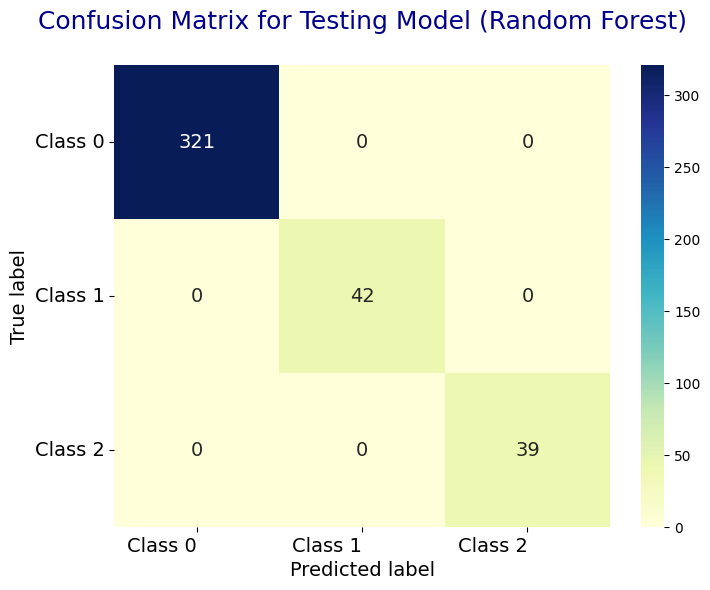

In [21]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_rf_test)

class_labels = ['Class 0', 'Class 1', 'Class 2']
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(conf_matrix_df, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model (Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)

plt.show()

In [22]:
# evaluasi decision tree training data
print(classification_report(y_train_resampled, y_dt))
print(confusion_matrix(y_train_resampled, y_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       743
           1       1.00      1.00      1.00       743
           2       1.00      1.00      1.00       743

    accuracy                           1.00      2229
   macro avg       1.00      1.00      1.00      2229
weighted avg       1.00      1.00      1.00      2229

[[743   0   0]
 [  0 743   0]
 [  0   0 743]]


In [23]:
# evaluasi decision tree testing data
print(classification_report(y_test, y_dt_test))
print(confusion_matrix(y_test, y_dt_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       321
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00        39

    accuracy                           1.00       402
   macro avg       1.00      1.00      1.00       402
weighted avg       1.00      1.00      1.00       402

[[321   0   0]
 [  0  42   0]
 [  0   0  39]]


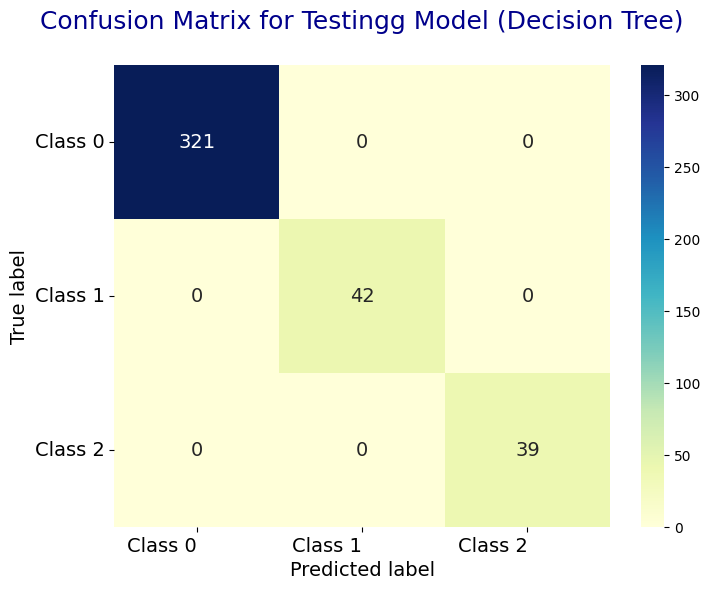

In [24]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_dt_test)

class_labels = ['Class 0', 'Class 1', 'Class 2']
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(conf_matrix_df, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testingg Model (Decision Tree)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)

plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

1. Hasil yang sangat baik pada data uji: F-1score 1.0, AUC 1.0, dan skor cross-validation yang tinggi menunjukkan bahwa model bekerja dengan sangat baik dalam mengklasifikasikan data yang telah diberikan. Ini mungkin menunjukkan bahwa data memang mudah diprediksi, atau model telah benar-benar mengoptimalkan kemampuannya.
2. Indikasi model yang stabil dan generalizable: Meskipun dilakukan penyesuaian untuk menangani ketidakseimbangan data dan mengurangi kompleksitas model melalui pengaturan parameter di Random Forest dan Decision Tree, hasil yang sangat baik pada data uji menunjukkan bahwa model mampu bekerja dengan sangat baik pada data yang tersedia. Ini menunjukkan bahwa model dapat menangkap pola yang relevan dengan efektif, meskipun ada potensi untuk peningkatan lebih lanjut pada data yang lebih beragam.